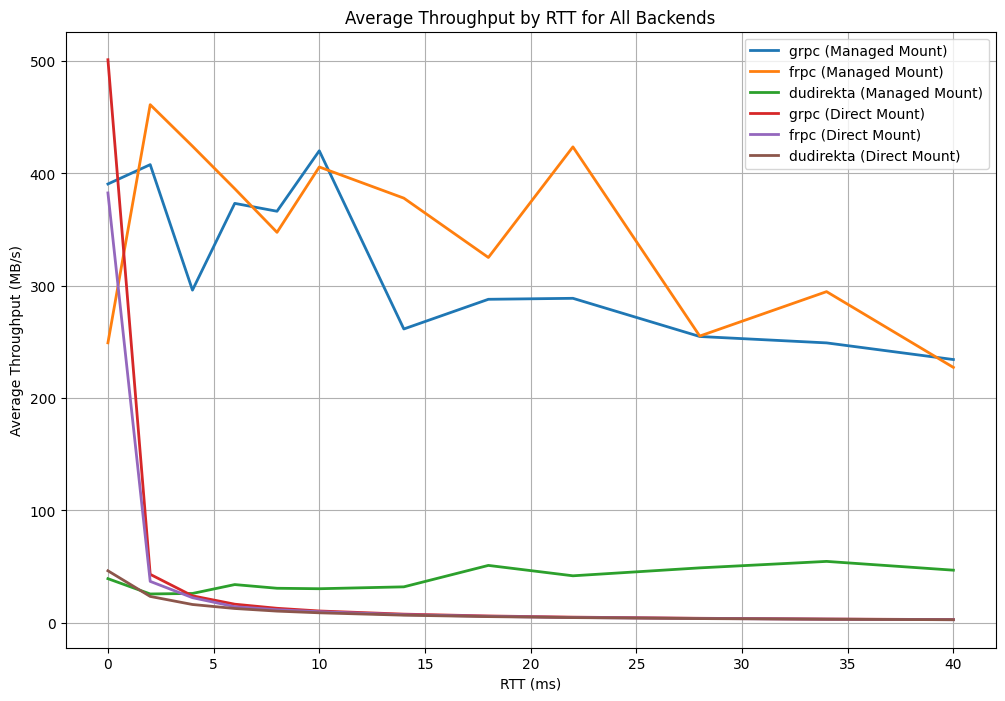

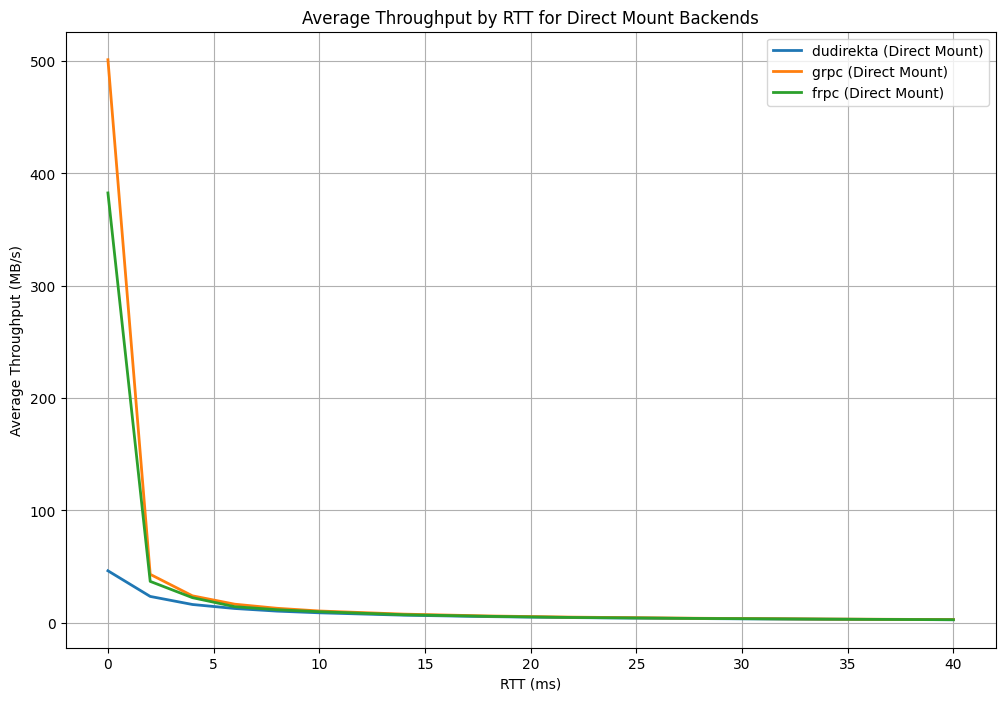

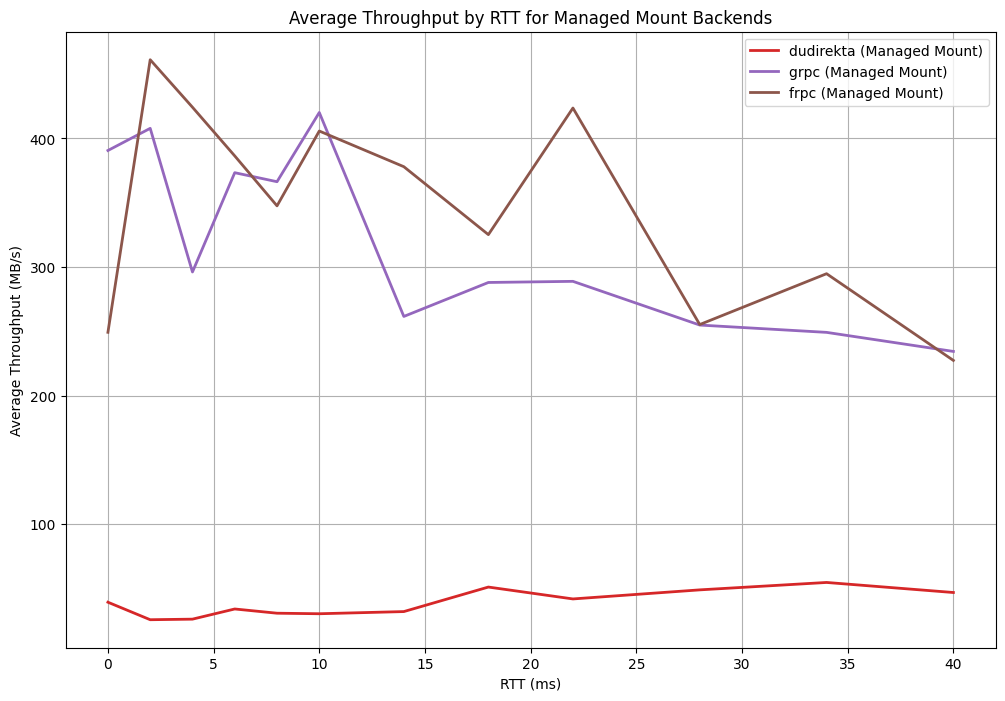

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../bench/transport-rttvar/results.csv')

# Remove the 'ms' suffix from the 'RTT (ms)' column
data['RTT (ms)'] = data['RTT (ms)'].str.replace('ms', '')

# Convert the 'RTT (ms)' column to numeric
data['RTT (ms)'] = pd.to_numeric(data['RTT (ms)'], errors='coerce')

# Forward fill missing values in 'RTT (ms)' column
data['RTT (ms)'] = data['RTT (ms)'].fillna(method='ffill')

# Calculate the average throughput for each RTT value
average_throughput = data.groupby('RTT (ms)').mean()

# Define a color map for better visualization
color_map = plt.get_cmap("tab10")

# Generate a list of colors from the color map
colors = [color_map(i) for i in range(len(average_throughput.columns))]

# Get the backend's value at the highest RTT
highest_rtt_values = average_throughput.loc[average_throughput.index.max()].sort_values(ascending=False)

# Create the order of the legend based on the backend's value at the highest RTT
legend_order = highest_rtt_values.index.tolist()

# Separate columns into direct and mounted
direct_columns = [column for column in data.columns if 'Direct Mount' in column]
mounted_columns = [column for column in data.columns if 'Managed Mount' in column]

# Create a line plot for all backends
plt.figure(figsize=(12, 8))
for i, column in enumerate(legend_order):
    # Simplify the legend by removing 'Throughput for' and '(MB/s)'
    simplified_column = column.replace('Throughput for ', '').replace(' (MB/s)', '')
    plt.plot(average_throughput.index, average_throughput[column], marker='', linewidth=2, label=simplified_column, color=colors[i])

plt.title('Average Throughput by RTT for All Backends')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.legend()
plt.grid(True)
plt.show()

# Create a line plot for Direct Mount backends
plt.figure(figsize=(12, 8))
for i, column in enumerate(direct_columns):
    # Simplify the legend by removing 'Throughput for' and '(MB/s)'
    simplified_column = column.replace('Throughput for ', '').replace(' (MB/s)', '')
    plt.plot(average_throughput.index, average_throughput[column], marker='', linewidth=2, label=simplified_column, color=colors[i])

plt.title('Average Throughput by RTT for Direct Mount Backends')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.legend()
plt.grid(True)
plt.show()

# Create a line plot for Managed Mount backends
plt.figure(figsize=(12, 8))
for i, column in enumerate(mounted_columns):
    # Simplify the legend by removing 'Throughput for' and '(MB/s)'
    simplified_column = column.replace('Throughput for ', '').replace(' (MB/s)', '')
    plt.plot(average_throughput.index, average_throughput[column], marker='', linewidth=2, label=simplified_column, color=colors[i+len(direct_columns)])

plt.title('Average Throughput by RTT for Managed Mount Backends')
plt.xlabel('RTT (ms)')
plt.ylabel('Average Throughput (MB/s)')
plt.legend()
plt.grid(True)
plt.show()